In [1]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# digunakan untuk menampilkan plot secara instan

# machine learning
from sklearn.svm import SVR
from sklearn import linear_model

# model persistence
from sklearn.externals import joblib

In [2]:
convert_dot = lambda x: x.replace(',','.')

In [3]:
df = pd.read_csv('UCP_Dataset.csv', sep=';')

## Data Wrangling

In [4]:
df['TCF'] = df['TCF'].apply(convert_dot)
df['ECF'] = df['ECF'].apply(convert_dot)
df.TCF = df.TCF.astype(float)
df.ECF = df.ECF.astype(float)

df.head()

,Project_No,Simple Actors,Average Actors,Complex Actors,UAW,Simple UC,Average UC,Complex UC,UUCW,TCF,ECF,Real_P20,Real_Effort_Person_Hours,Sector,Language,Methodology,ApplicationType,DataDonator
0,1,1.0,1,2,9,6,10,15,355,0.81,0.84,"398,5",7970,Manufacturing,Java,NaN,NaN,D1
1,2,1.0,2,1,8,4,20,15,445,0.99,0.99,"398,1",7962,NaN,NaN,NaN,NaN,D1
2,3,0.0,0,3,9,1,5,20,355,1.03,0.80,"396,75",7935,Banking,C#,NaN,Business Application,D1
3,4,0.0,1,2,8,5,10,15,350,0.90,0.91,"390,25",7805,Communication,C++,NaN,Real-Time application,D1
4,5,1.0,2,1,8,1,10,16,345,0.90,0.91,"387,9",7758,Manufacturing,NaN,Waterfall,Real-Time Application,D1


## Feature Extraction

In [5]:
# menghitung nilai UUCP
df['UUCP'] = df['UAW'] + df['UUCW']

# menghitung nilai UCP
df['UCP'] = df['UUCP'] * df['TCF'] * df['ECF']

# menghitung estimasi effort dalam man-hour
df['Effort_Estimation'] = df['UCP'] * 20

## Feature Selection

In [6]:
df[['Effort_Estimation', 'Real_Effort_Person_Hours']].sort_values(by='Effort_Estimation', ascending=True).head()

,Effort_Estimation,Real_Effort_Person_Hours
40,2283.372,6232
26,2522.052,6787
37,3026.872,6360
59,3193.488,5880
44,3426.300,6062


In [7]:
# X = df['Effort_Estimation'].as_matrix().reshape(-1, 1)
# y = df['Real_Effort_Person_Hours'].as_matrix()

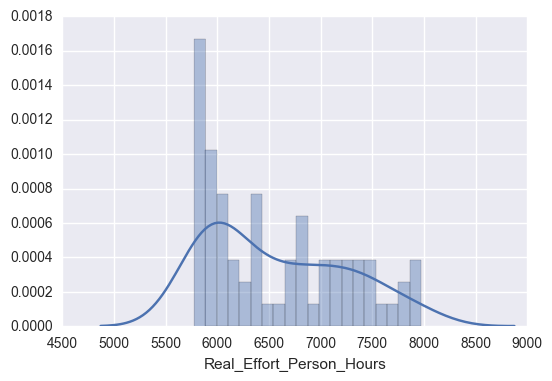

In [8]:
# df['Real_Effort_Person_Hours'].hist()
sns.distplot(df['Real_Effort_Person_Hours'], bins=20)

In [9]:
# df['Log_Real'] = df['Real_Effort_Person_Hours'].apply(lambda x: np.log(x+1))
# df[['Effort_Estimation', 'Log_Real']].sort_values(by='Effort_Estimation', ascending=True).head()

In [10]:
# df['Real_Effort_Person_Hours'].hist()
# sns.distplot(df['Log_Real'], bins=20)

In [11]:
X = df['Effort_Estimation'].as_matrix().reshape(-1, 1)
# y = df['Log_Real'].as_matrix()

y = df['Real_Effort_Person_Hours'].as_matrix()

## Machine Learning

In [12]:
svr_lin = SVR(kernel='linear', C=1e3)
lin_reg = linear_model.LinearRegression()

y_reg = lin_reg.fit(X, y).predict(X)

<module 'matplotlib.pyplot' from 'C:\Program Files\Anaconda2\lib\site-packages\matplotlib\pyplot.py'>

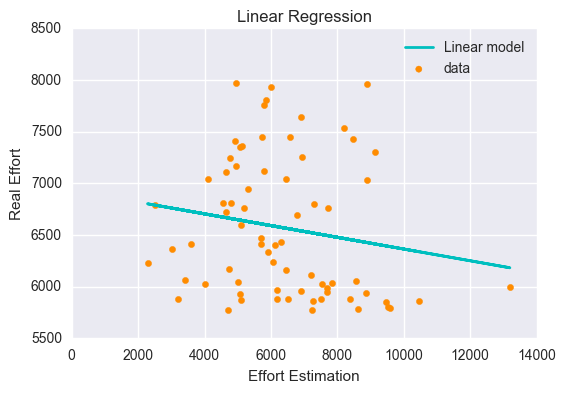

In [13]:
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_reg, color='c', lw=lw, label='Linear model')
plt.xlabel('Effort Estimation')
plt.ylabel('Real Effort')
plt.title('Linear Regression')
plt.legend()
plt

In [14]:
prd = np.array([[1000]])
y_predict = lin_reg.predict(prd)
int(round(y_predict))

6875